In [1]:
# -*- coding: cp936 -*- 
import time
from PIL import Image,ImageGrab
import os, win32gui, win32ui, win32con, win32api 

In [3]:
def window_capture(dpath): 
    '''
    截屏函数,调用方法window_capture(‘d:\\’) ,参数为指定保存的目录
    返回图片文件名,文件名格式:日期.jpg 如:2009328224853.jpg
     '''
    hwnd = 0 
    hwndDC = win32gui.GetWindowDC(hwnd)  
    mfcDC=win32ui.CreateDCFromHandle(hwndDC)  
    saveDC=mfcDC.CreateCompatibleDC()  
    saveBitMap = win32ui.CreateBitmap()  
    MoniterDev=win32api.EnumDisplayMonitors(None,None) 
    w = MoniterDev[0][2][2] 
    h = MoniterDev[0][2][3] 
    #print w,h　　　＃图片大小 
    saveBitMap.CreateCompatibleBitmap(mfcDC, w, h)  
    saveDC.SelectObject(saveBitMap)  
    saveDC.BitBlt((0,0),(w, h) , mfcDC, (0,0), win32con.SRCCOPY) 
    cc=time.gmtime() 
    bmpname = str(cc[0])+str(cc[1])+str(cc[2])+str(cc[3]+8)+str(cc[4])+str(cc[5])+'.bmp' 
    saveBitMap.SaveBitmapFile(saveDC, bmpname) 
    Image.open(bmpname).save(bmpname[:-4] + '.jpg') 
    os.remove(bmpname) 
    jpgname=bmpname[:-4]+'.jpg' 
    djpgname=dpath+jpgname 
    copy_command = 'move %s %s' % (jpgname, djpgname) 
    os.popen(copy_command) 
    return bmpname[:-4]+'.jpg' 

### 测试win32截屏速度
输出结果为0.375秒，也就是说通过windows API每次截图只需要0.0375s，真是快得一逼呀。

In [45]:
def window_capture(filename):
    hwnd = 0 # 窗口的编号，0号表示当前活跃窗口
    # 根据窗口句柄获取窗口的设备上下文DC（Divice Context）
    hwndDC = win32gui.GetWindowDC(hwnd)
    # 根据窗口的DC获取mfcDC
    mfcDC = win32ui.CreateDCFromHandle(hwndDC)
    # mfcDC创建可兼容的DC
    saveDC = mfcDC.CreateCompatibleDC()
    # 创建bigmap准备保存图片
    saveBitMap = win32ui.CreateBitmap()
    # 获取监控器信息
    MoniterDev = win32api.EnumDisplayMonitors(None, None)
    w = MoniterDev[0][2][2]
    h = MoniterDev[0][2][3]
    # print w,h　　　#图片大小
    # 为bitmap开辟空间
    saveBitMap.CreateCompatibleBitmap(mfcDC, w, h)
    # 高度saveDC，将截图保存到saveBitmap中
    saveDC.SelectObject(saveBitMap)
    # 截取从左上角（0，0）长宽为（w，h）的图片
    saveDC.BitBlt((0, 0), (w, h), mfcDC, (0, 0), win32con.SRCCOPY)
    saveBitMap.SaveBitmapFile(saveDC, filename)
beg = time.time()
for i in range(10):
    window_capture("haha.jpg")
end = time.time()
print(end - beg)

0.339644193649292


### 改造上面方法

In [61]:
def window_capture(filename,box):
    '''windows 窗口截图'''
    hwnd = 0 # 窗口的编号，0号表示当前活跃窗口
    # 根据窗口句柄获取窗口的设备上下文DC（Divice Context）
    hwndDC = win32gui.GetWindowDC(hwnd)
    # 根据窗口的DC获取mfcDC
    mfcDC = win32ui.CreateDCFromHandle(hwndDC)
    # mfcDC创建可兼容的DC
    saveDC = mfcDC.CreateCompatibleDC()
    # 创建bigmap准备保存图片
    saveBitMap = win32ui.CreateBitmap()
    # 获取监控器信息
    w = box[2] - box[0]
    h = box[3] - box[1]
    # 为bitmap开辟空间
    saveBitMap.CreateCompatibleBitmap(mfcDC, w, h)
    # 高度saveDC，将截图保存到saveBitmap中
    saveDC.SelectObject(saveBitMap)
    # 截取从左上角（0，0）长宽为（w，h）的图片
    #  参数 (原点)（右下点） mfcDC （左上点）
    saveDC.BitBlt((0,0), (box[2], box[3]), mfcDC, (box[0], box[1]), win32con.SRCCOPY)
    saveBitMap.SaveBitmapFile(saveDC, filename)

### 获取鼠标位置

In [4]:
win32gui.GetCursorPos()

(1089, 406)

### 获取屏幕分辨率

In [8]:
def getResolution():
    width = win32api.GetSystemMetrics(win32con.SM_CXSCREEN)
    height = win32api.GetSystemMetrics(win32con.SM_CYSCREEN)
    return width,height
getResolution()

(1920, 1080)

In [10]:
1080 /1.25

864.0

In [7]:
1536 *1.25

1920.0

In [10]:
864*1.25

1080.0

### 修改屏幕分辨率

In [18]:
import win32api
def setResolution(width= 1920,height= 1080):
    dm = win32api.EnumDisplaySettings(None, 0)
    dm.PelsHeight = height
    dm.PelsWidth = width
    dm.BitsPerPel = 32
    dm.DisplayFixedOutput = 0
    win32api.ChangeDisplaySettings(dm, 0)
    
setResolution()
getResolution()

(1920, 1080)

### 获取某个窗口的尺寸（两个函数结果一样）GetClientRect ￥GetWindowRect
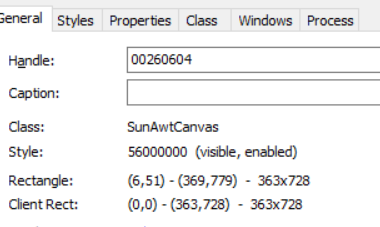

In [5]:
import win32api
import win32gui
import win32con
#获取桌面
hwnd = win32gui.GetDesktopWindow()
u"hwnd is %x" %(hwnd)

'hwnd is 10010'

In [6]:
(left, top, right, bottom) = win32gui.GetClientRect(hwnd)
print(left, top, right, bottom)

0 0 1536 864


### 下面4句依次寻找对象，直到找到输入框Edit对象的句柄
![示例网址]:(http://www.sahitest.com/demo/php/fileUpload.htm)

In [57]:
dialog = win32gui.FindWindow('#32770',u'文件上传')
dialog

787452

In [58]:
ComboBoxEx32 = win32gui.FindWindowEx(dialog,0,"ComboBoxEx32",None)
ComboBoxEx32

394054

In [59]:
ComboBox = win32gui.FindWindowEx(ComboBoxEx32, 0, 'ComboBox', None)
ComboBox

394002

In [60]:
Edit = win32gui.FindWindowEx(ComboBox, 0, 'Edit', None)
Edit

525078

In [61]:
button = win32gui.FindWindowEx(dialog, 0, 'Button', None) # 确定按钮
button

394012

In [62]:
win32gui.SendMessage(Edit, win32con.WM_SETTEXT, None, '2018314104524.jpg')# 往输入框输入绝对地址

1

In [63]:
win32gui.SendMessage(dialog, win32con.WM_COMMAND, 1, button) 
# 按button 

0

## Lib/site-packages/win32/Demos/win32gui_demo.py